### Evaluation with plots


In [7]:
import numpy as np
from texttable import Texttable
import latextable
import matplotlib.pyplot as plt
from glob import glob

#### bar charts for hypernym relation with 4 models PRECISION

##### wordnet

In [31]:
# Load the results

models = ["bert", "roberta", "electra", "phi-1.5"]
kb = "wn"


precisions_models = {}
for model in models:
    main_folder = f'/Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/{model}/{kb}'

    precisions = []

    for file in glob(main_folder+'/**/*.txt'):
        print(f'File: {file}')
        
        #print(file.split("\\")[-2])
        type_relation = file.split("\\")[-2]
        # estrarre il tipo di test (is_a, specific_term, such_as) dal path del file

        with open(file, 'r', encoding="utf8") as f:
            lines = f.readlines()[:4] # Only the first 4 lines are precision@k
            
            prec_rel_k = []
            for line in lines:
                split = line.strip().split(": ")
                prec_k = split[0]
                prec_v = round(float(split[1]), 2)
                prec_rel_k.append(prec_v)

        precisions.append((type_relation, prec_rel_k))

    precisions_models[model] = precisions


print(precisions_models)



#with open('results.txt', 'r', encoding="utf8") as f:



File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/wn\is_a\hypernym_sents_masked_first_20.txt
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/wn\is_a\hypernym_sents_masked_second_20.txt
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/wn\specific_term\hypernym_sents_masked_first_20.txt
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/wn\specific_term\hypernym_sents_masked_second_20.txt
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/wn\such_as\hypernym_sents_masked_first_20.txt
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/wn\such_as\hypernym_sents_masked_second_20.txt
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/roberta/wn\is_a\hypernym_sents_masked_first_20.txt
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/roberta/wn\is_a\hypernym_sents_masked_second_20.txt
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/roberta/wn\specific_term\hypernym_sents_masked_firs

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]
0 0 0
1 0 1
2 1 0
3 1 1
4 2 0
5 2 1


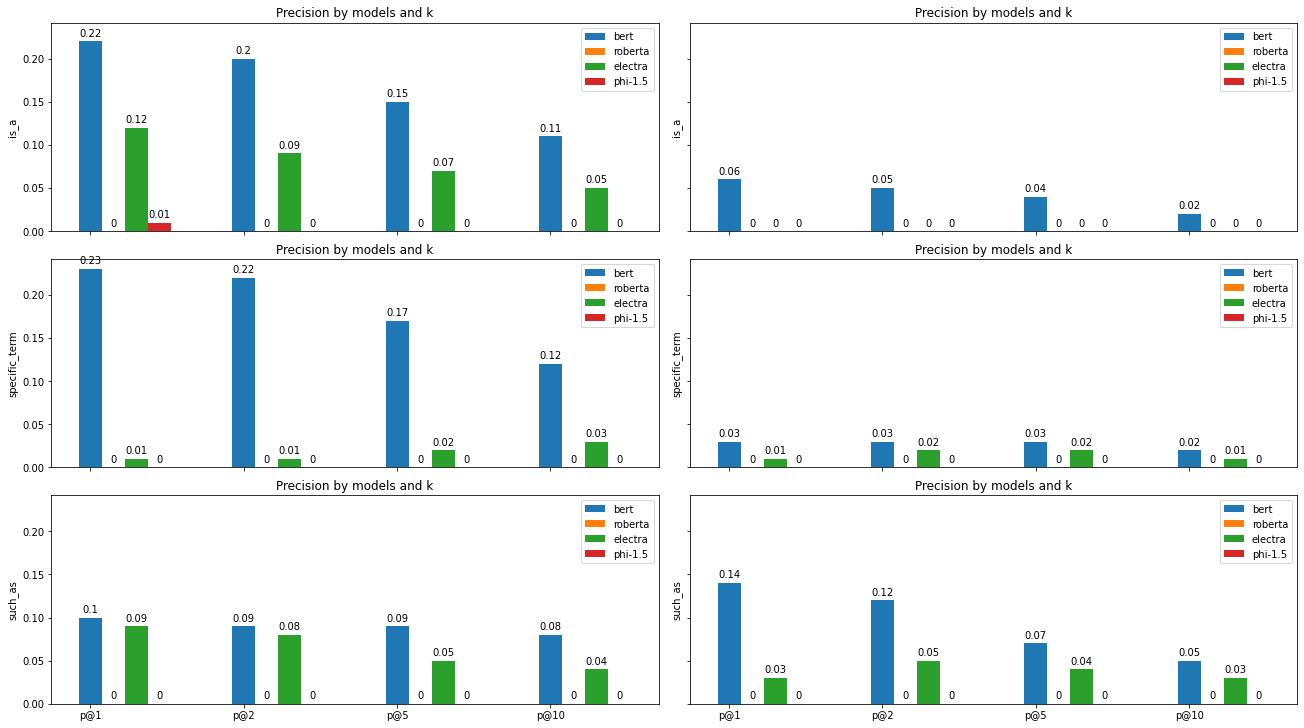

In [32]:
fig, axes = plt.subplots(3, 2, sharex=True, sharey=True, layout="constrained", figsize=(18, 10))

print(axes)

width = 0.15  # the width of the bars

models = tuple(models) # ci sono i modelli utilizzati 

relations = ("is_a", "specific_term", "such_as") # ci sono i tipi di relazione utilizzati 

labels = ("p@1", "p@2", "p@5", "p@10") # ci sono i valori di k utilizzati

x = np.arange(len(labels))  # the label of precision

for (i, (j, k)) in enumerate([(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]):

    print(i, j, k)
    

    rects1 = axes[j, k].bar(x, precisions_models[models[0]][i][1], width, label=models[0])
    axes[j, k].bar_label(rects1, padding=3)
    
    rects2 = axes[j, k].bar(x + width, precisions_models[models[1]][i][1], width, label=models[1])
    axes[j, k].bar_label(rects2, padding=3)

    rects3 = axes[j, k].bar(x + 2*width, precisions_models[models[2]][i][1], width, label=models[2])
    axes[j, k].bar_label(rects3, padding=3)

    rects4 = axes[j, k].bar(x + 3*width, precisions_models[models[3]][i][1], width, label=models[3])
    axes[j, k].bar_label(rects4, padding=3)
    


    #rects1 = ax.bar(x - width/2, men_means, width, label='')
    #rects2 = ax.bar(x + width/2, women_means, width, label='')


    # Add some text for labels, title and custom x-axis tick labels, etc.
    axes[j, k].set_ylabel(precisions_models[models[0]][i][0])
    axes[j, k].set_title('Precision by models and k')
    axes[j, k].set_xticks(x, labels)
    axes[j, k].legend()


plt.show()

In [ ]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, layout="constrained")

# Matplotlib marker symbol
axs[0, 0].scatter(x, y, s=80, c=z, marker=">")
axs[0, 0].set_title("marker='>'")

# marker from TeX: passing a TeX symbol name enclosed in $-signs
axs[0, 1].scatter(x, y, s=80, c=z, marker=r"$\clubsuit$")
axs[0, 1].set_title(r"marker=r'\$\clubsuit\$'")

# marker from path: passing a custom path of N vertices as a (N, 2) array-like
verts = [[-1, -1], [1, -1], [1, 1], [-1, -1]]
axs[0, 2].scatter(x, y, s=80, c=z, marker=verts)
axs[0, 2].set_title("marker=verts")

# regular pentagon marker
axs[1, 0].scatter(x, y, s=80, c=z, marker=(5, 0))
axs[1, 0].set_title("marker=(5, 0)")

# regular 5-pointed star marker
axs[1, 1].scatter(x, y, s=80, c=z, marker=(5, 1))
axs[1, 1].set_title("marker=(5, 1)")

# regular 5-pointed asterisk marker
axs[1, 2].scatter(x, y, s=80, c=z, marker=(5, 2))
axs[1, 2].set_title("marker=(5, 2)")

plt.show()

In [ ]:
# create bar plot precision

models = tuple(models) # ci sono i modelli utilizzati 

relations = ("is_a", "specific_term", "such_as") # ci sono i tipi di relazione utilizzati 

precision_means = {
    'p@1': (inserisco i valori letti),
    'p@2': (inserisco i valori letti),
    'p@5': (inserisco i valori letti),
    'p@10': (inserisco i valori letti),
}

x = np.arange(len(models))  # the label models
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in precision_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precision@1')
ax.set_title('Precision@1 for BERT, RoBERTa, Phi-1.5 and ELECTRA models on WordNet')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

##### conceptnet